# Alex Belianinov
# Center for Nanophase Materials Sciences, 
# Oak Ridge National Laboratory 

### Adaptive Thresholding Example

In [1]:
import cv2 #image processing lib
import numpy as np #fast math
from matplotlib import pyplot as plt #plotting
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 10] #figure size

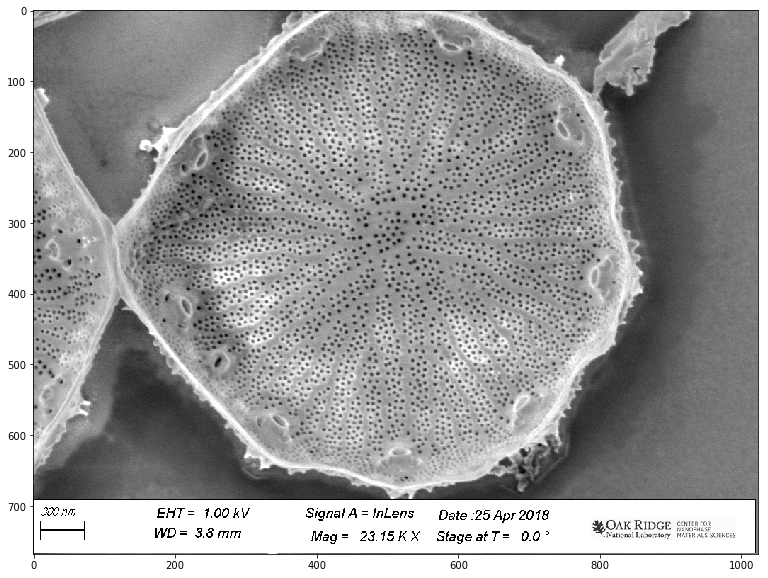

In [2]:
img = cv2.imread('Wild006.tif') #load in image
plt.imshow(img) #show image data

(691, 1024, 3)


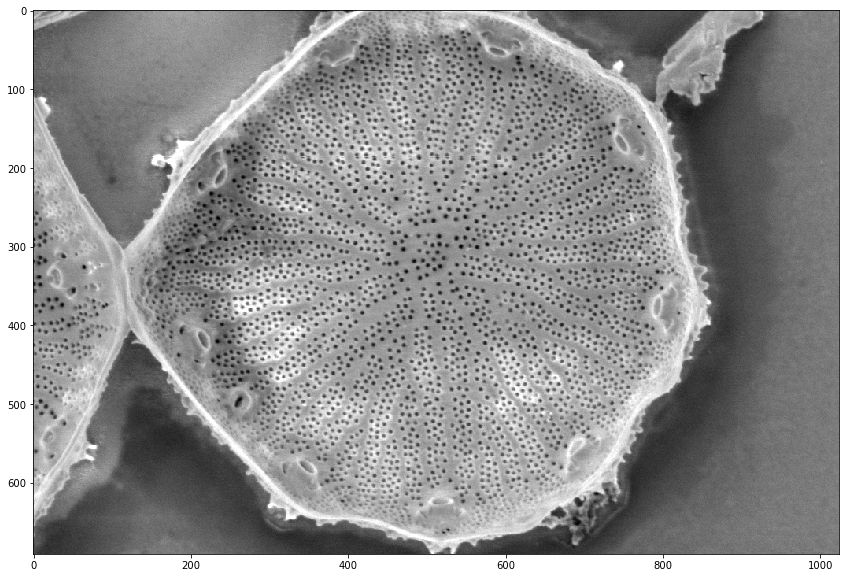

In [3]:
img_crop = img[:-77, :] #crop the bar at the bottom
plt.imshow(img_crop) #show the cropped image
print(np.shape(img_crop)) #print the shape of the image matrix

In [4]:
img_gray = cv2.cvtColor(img_crop, cv2.COLOR_RGB2GRAY) #flatten image matrix to 2D
print(np.shape(img_gray)) #check shape

(691, 1024)


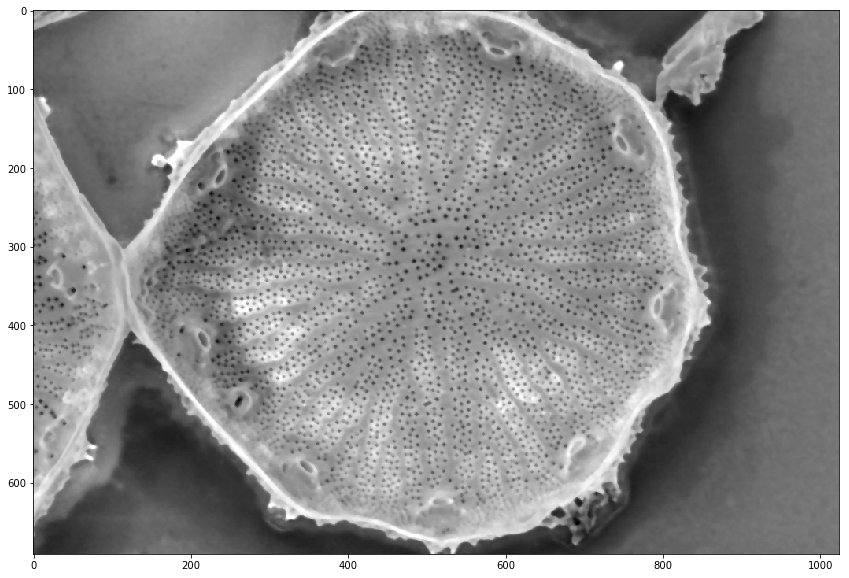

In [5]:
img_blur = cv2.medianBlur(img_gray,5) #light image blur
plt.imshow(img_blur, 'gray') 

In [6]:
ret,th1 = cv2.threshold(img_blur,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, # mean of neighbourhood area
            cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # weighted sum of neighbourhood with
                                                                          # weights as a gaussian window
            cv2.THRESH_BINARY,11,2)

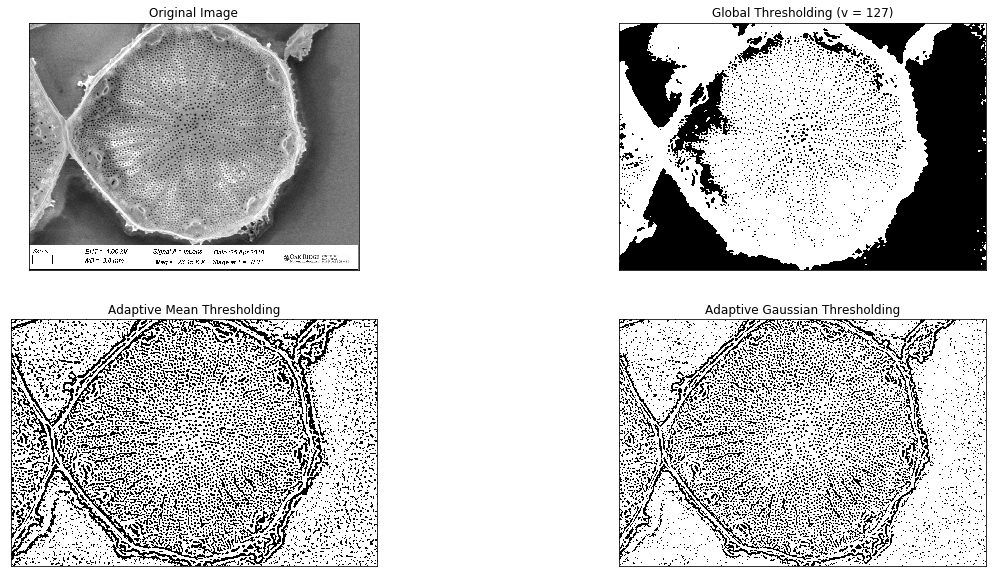

In [7]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding'] #image titles

images = [img, th1, th2, th3] #image data

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [8]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
img = img_as_ubyte(img_blur)

radius = 13
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu


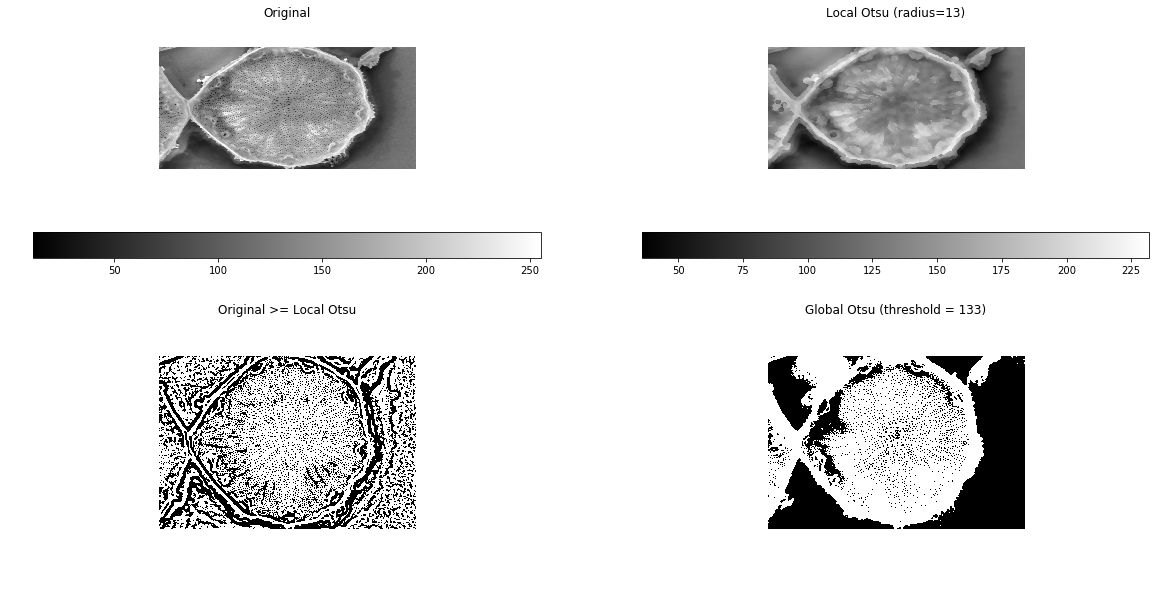

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()


fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()